<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2466694903.py:11: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=cols)


Dataset Loaded. Shape: (20631, 26)
First 5 rows:
   unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18

/tmp/ipython-input-2466694903.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('unit_nr').apply(add_rul)


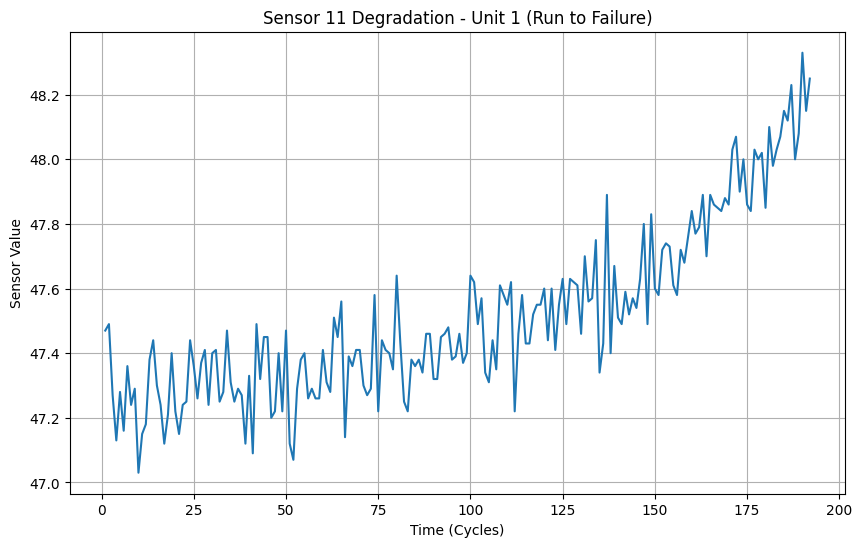

Processed data saved to 'aerosense_processed_data.csv'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Defining the 26 Column Names based on your proposal
# Unit, Time, 3 Settings, 21 Sensors
cols = ['unit_nr', 'time_cycles', 'setting_1', 'setting_2', 'setting_3']
cols += [f's_{i}' for i in range(1, 22)]

# 2. Loading the Data (FD001 is the training set)
df = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=cols)

print(f"Dataset Loaded. Shape: {df.shape}")
print("First 5 rows:")
print(df.head())

# 3. Engineering Target 1: Remaining Useful Life (RUL)
# For the training set, the max cycle for a unit is its point of failure.
# RUL = Max Cycle - Current Cycle
def add_rul(g):
    g['RUL'] = g['time_cycles'].max() - g['time_cycles']
    return g

df = df.groupby('unit_nr').apply(add_rul)

# 4. Engineering Target 2: Binary Classification Label (Safe vs. Warning)
# We define "Warning" as within 30 cycles of failure.
# 0 = Safe, 1 = Warning
w = 30
df['label_bc'] = df['RUL'].apply(lambda x: 1 if x <= w else 0)

# Checking the new columns
print("\nData with Targets (RUL and label_bc):")
print(df[['unit_nr', 'time_cycles', 'RUL', 'label_bc']].head())

# 5. Exploratory Visualization
# Plotting Sensor 11 (High Pressure Turbine) for Unit 1 to show degradation
plt.figure(figsize=(10, 6))
unit_1 = df[df['unit_nr'] == 1]
plt.plot(unit_1['time_cycles'], unit_1['s_11'])
plt.title('Sensor 11 Degradation - Unit 1 (Run to Failure)')
plt.xlabel('Time (Cycles)')
plt.ylabel('Sensor Value')
plt.grid(True)
plt.show()

# 6. Saving the processed file
df.to_csv('aerosense_processed_data.csv', index=False)
print("Processed data saved to 'aerosense_processed_data.csv'")